In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(train_feature, train_label), (test_feature, test_label) = cifar10.load_data()

In [3]:
print("train data:", "feature:", train_feature.shape, "label:", train_label.shape)
print("test data:", "feature:", test_feature.shape, "label:", test_label.shape)

train data: feature: (50000, 32, 32, 3) label: (50000, 1)
test data: feature: (10000, 32, 32, 3) label: (10000, 1)


In [4]:
#取得第一筆資料第一個點的RBG數值
train_feature[0][0][0]

array([59, 62, 63], dtype=uint8)

In [5]:
#RBG數值最大255，將資料正規化須除以255
train_feature_normalize = train_feature.astype('float32') / 255.0
test_feature_normalize = test_feature.astype('float32') / 255.0

In [6]:
#正規化數值會介於0~1之間
train_feature_normalize[0][0][0]

array([ 0.23137255,  0.24313726,  0.24705882], dtype=float32)

In [7]:
from keras.utils import np_utils

In [8]:
#分類的標籤需轉成onehot格式
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [10]:
#建立一個線性堆疊模型
model = Sequential()

In [11]:
#建立第1層券積層，透過濾鏡產生32個影像特徵
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same'))

In [12]:
#在第1層券積層加入Dropout層，避免overfitting
model.add(Dropout(rate=0.25))

In [13]:
#建立第1層池化層，將32*32影像，縮小為16*16影像
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
#建立第2層券積層，透過濾鏡產生64個影像特徵
model.add(Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

In [15]:
#在第2層券積層加入Dropout層，避免overfitting
model.add(Dropout(rate=0.25))

In [16]:
#建立第2層池化層，將16*16影像，縮小為8*8影像
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#建立平坦層，將64個8*8影像轉換為一維向量，64*8*8=4096個數字
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
#建立有1024個神經元的隱藏層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
#建立有10個神經元的輸出層
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [21]:
#設定訓練方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
#開始訓練
#train_feature_normalize:已正規化的訓練集特徵資料
#train_label_onehot:onehot格式的訓練集標籤資料
#validation_split=0.2:使用訓練集中的20%作為驗證資料，共50000*0.2筆資料
#epochs=10:執行10次訓練週期
#batch_size=128:訓練時，每一批次使用128筆資料，大約會分40000/128=313批次訓練
#verbose=2:顯示訓練過程
train_history = model.fit(train_feature_normalize, train_label_onehot, 
                          validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
98s - loss: 1.4997 - acc: 0.4602 - val_loss: 1.2813 - val_acc: 0.5824
Epoch 2/10
98s - loss: 1.1345 - acc: 0.5965 - val_loss: 1.1101 - val_acc: 0.6369
Epoch 3/10
95s - loss: 0.9813 - acc: 0.6565 - val_loss: 1.0118 - val_acc: 0.6667
Epoch 4/10
100s - loss: 0.8756 - acc: 0.6918 - val_loss: 0.9399 - val_acc: 0.6969
Epoch 5/10
101s - loss: 0.7896 - acc: 0.7242 - val_loss: 0.8888 - val_acc: 0.7013
Epoch 6/10
100s - loss: 0.7055 - acc: 0.7520 - val_loss: 0.8436 - val_acc: 0.7216
Epoch 7/10
97s - loss: 0.6253 - acc: 0.7803 - val_loss: 0.8066 - val_acc: 0.7303
Epoch 8/10
96s - loss: 0.5612 - acc: 0.8009 - val_loss: 0.7794 - val_acc: 0.7402
Epoch 9/10
96s - loss: 0.4904 - acc: 0.8261 - val_loss: 0.7602 - val_acc: 0.7442
Epoch 10/10
97s - loss: 0.4364 - acc: 0.8480 - val_loss: 0.7719 - val_acc: 0.7393


In [23]:
#使用測試集評估模型準確度
scores = model.evaluate(test_feature_normalize, test_label_onehot)

 9920/10000 [============================>.] - ETA: 0s

In [24]:
scores[1]

0.72870000000000001

In [25]:
#使用建好的模型進行預測
#使用model.predict_classes()取得預測分類
prediction = model.predict_classes(test_feature_normalize)

 9952/10000 [============================>.] - ETA: 0s

In [26]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [27]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat",
              4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [28]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, offset, length=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if length > 25: length = 25
    for i in range(0, length):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[offset], cmap='binary')
        title = str(labels[offset][0]) + "." + label_dict[labels[offset][0]]
        if len(prediction) > 0:
            title += "=>" + label_dict[prediction[offset]]
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]);
        ax.set_yticks([]);
        offset += 1
    plt.show()

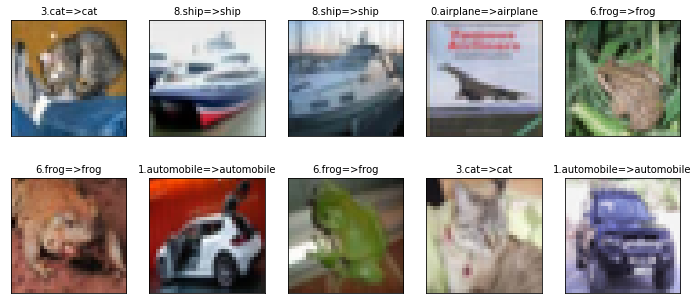

In [29]:
plot_images_labels_prediction(test_feature, test_label, prediction, 0)

In [30]:
#使用model.predict()取得每一種類別的預測機率
predicted_probability = model.predict(test_feature_normalize)

In [31]:
def show_predicted_probability(feature, label, prediction, predicted_probability, i):
    print('lebal:', label_dict[label[i][0]], '\npredict:', label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(feature[i], (32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + ' probability:%1.5f'%(predicted_probability[i][j]))

lebal: cat 
predict: cat


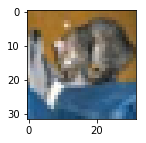

airplane probability:0.00383
automobile probability:0.00379
bird probability:0.03227
cat probability:0.58196
deer probability:0.00635
dog probability:0.27873
frog probability:0.05957
horse probability:0.00399
ship probability:0.02634
truck probability:0.00318


In [32]:
show_predicted_probability(test_feature, test_label, prediction, predicted_probability, 0)

lebal: airplane 
predict: airplane


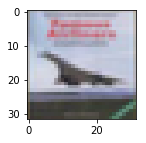

airplane probability:0.77157
automobile probability:0.00267
bird probability:0.05803
cat probability:0.00122
deer probability:0.00196
dog probability:0.00002
frog probability:0.00002
horse probability:0.00001
ship probability:0.16333
truck probability:0.00116


In [33]:
show_predicted_probability(test_feature, test_label, prediction, predicted_probability, 3)

In [34]:
predicted_probability.shape

(10000, 10)

In [36]:
#儲存模型的權重，當模型要訓練比較久時，可預先儲存幾個週期的權重。
#當系統發生錯誤而終止時，可載入之前已經訓練好的權重，將未訓練的週期完成。
model.save_weights("/Users/PChomeIM/pywork/SaveModel/CifarCNNModelWeights.h5")

In [37]:
#儲存整個模型，包含結構、權重、損失函數和最佳化方法
model.save("/Users/PChomeIM/pywork/SaveModel/CifarCNNModel.h5")